# Data Preprocessing



In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [13]:
books_data = pd.read_csv('https://raw.githubusercontent.com/ChetanNain/CMPE-255-Final-Project/main/data/books_data.csv')
ratings_data = pd.read_csv('https://raw.githubusercontent.com/ChetanNain/CMPE-255-Final-Project/main/data/books_ratings_data.csv')
book_tags_data = pd.read_csv('https://raw.githubusercontent.com/ChetanNain/CMPE-255-Final-Project/main/data/book_tags_data.csv')
tags_data = pd.read_csv('https://raw.githubusercontent.com/ChetanNain/CMPE-255-Final-Project/main/data/tags_data.csv')



,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
...,...,...
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ


In [14]:
books_data.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [18]:
books_data.shape

(10000, 23)

In [15]:
ratings_data.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [19]:
ratings_data.shape

(981756, 3)

In [16]:
book_tags_data.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [20]:
book_tags_data.shape

(999912, 3)

In [17]:
tags_data.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [21]:
tags_data.shape

(34252, 2)

## Data Exploratory Analysis

### Sorting data according to the average ratings

In [23]:
sortedData = books_data[books_data['ratings_count']>=1500]
sortedData = sortedData.sort_values('average_rating', ascending=False)
sortedData.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3627,3628,24812,24812,25599,14,740748475,9.780741e+12,Bill Watterson,2005.0,The Complete Calvin and Hobbes,...,28900,29968,861,120,154,693,3117,25884,https://images.gr-assets.com/books/1473064526m...,https://images.gr-assets.com/books/1473064526s...
3274,3275,8,8,21457576,11,439682584,9.780440e+12,"J.K. Rowling, Mary GrandPré",2003.0,NaN,...,33220,33424,156,317,233,978,3686,28210,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
861,862,17332218,17332218,16482835,34,765326361,9.780765e+12,Brandon Sanderson,2014.0,Words of Radiance,...,73572,108176,7261,154,404,2653,18272,86693,https://images.gr-assets.com/books/1391535251m...,https://images.gr-assets.com/books/1391535251s...
8853,8854,95602,95602,920037,6,842339523,9.780842e+12,Francine Rivers,1993.0,Mark of the Lion Trilogy,...,9081,9547,731,27,61,323,1363,7773,https://images.gr-assets.com/books/1349032180m...,https://images.gr-assets.com/books/1349032180s...
7946,7947,5031805,5031805,40769318,96,1433502410,9.781434e+12,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,NaN,...,8953,10784,262,98,90,367,1152,9077,https://images.gr-assets.com/books/1410151002m...,https://images.gr-assets.com/books/1410151002s...


Text(0, 0.5, 'Book Title')

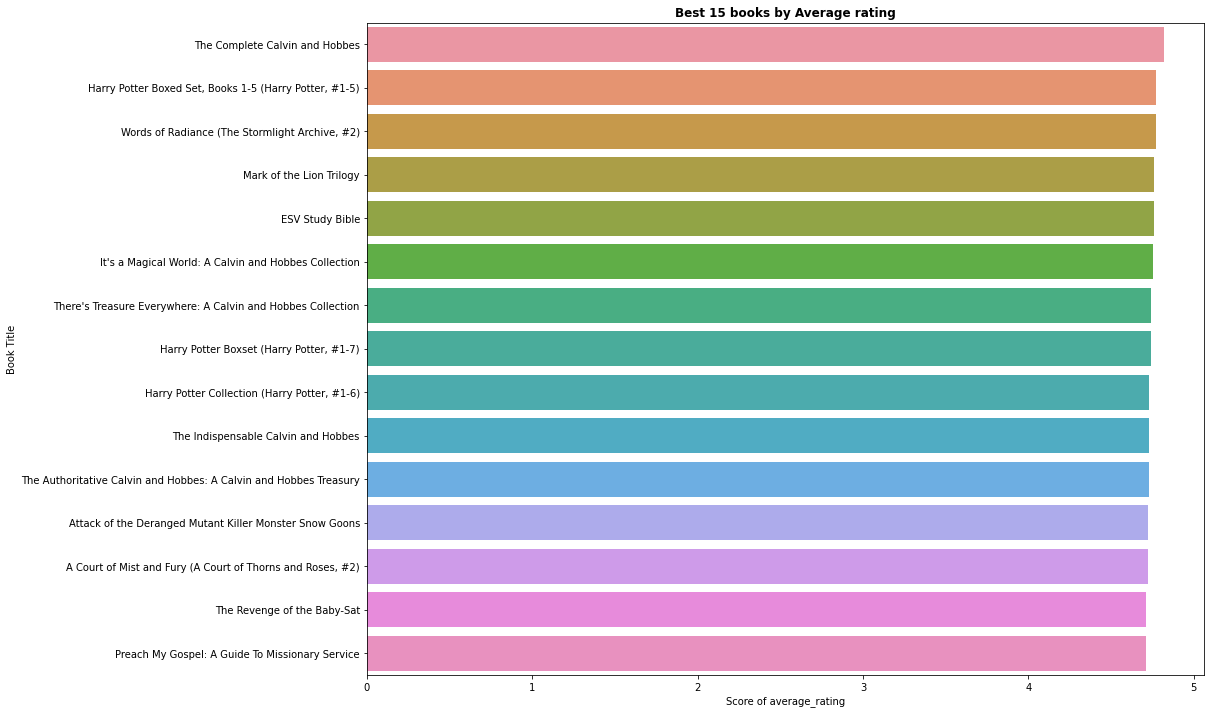

In [30]:
plt.figure(figsize=(15,12))
ax = sns.barplot(x=sortedData['average_rating'].head(15), y=sortedData['title'].head(15), data=sortedData)
plt.title('Best ' + str(15) + ' books by ' + 'average_rating'.replace('_',' ').capitalize(), weight='bold')
plt.xlabel('Score of ' + 'average_rating')
plt.ylabel('Book Title')    



plt.bar('Education', 'Salary',data=df)
plt.xlabel("Education", size=15)
plt.ylabel("Salary in US Dollars", size=15)
plt.title("Barplot with Matplotlib", size=18)
plt.savefig("bar_plot_matplotlib_Python.png")

In [ ]:
important_columns = ['title','authors','average_rating','ratings_count','work_text_reviews_count']

In [ ]:
book_sorted_ratings = books[books['ratings_count']>=1000].sort_values('average_rating', ascending=False)
book_sorted_ratings[important_columns].head(15)

In [31]:
! git clone https://github.com/ChetanNain/CMPE-255-Final-Project.git

Cloning into 'CMPE-255-Final-Project'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 98 (delta 30), reused 45 (delta 11), pack-reused 0
Unpacking objects: 100% (98/98), done.


In [32]:
! git status

fatal: not a git repository (or any of the parent directories): .git


In [33]:
% cd CMPE-255-Final-Project/


/content/CMPE-255-Final-Project


In [35]:
! git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [36]:
! pwd

/content/CMPE-255-Final-Project
